<a href="https://colab.research.google.com/github/SanjayMuthuswamy/iris-classification/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))



Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [2]:
# print(iris_dataset.feature_names)
iris_df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
iris_df.head()
# print(iris_df.isnull().sum())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_dataset.target[:150]   #  Target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

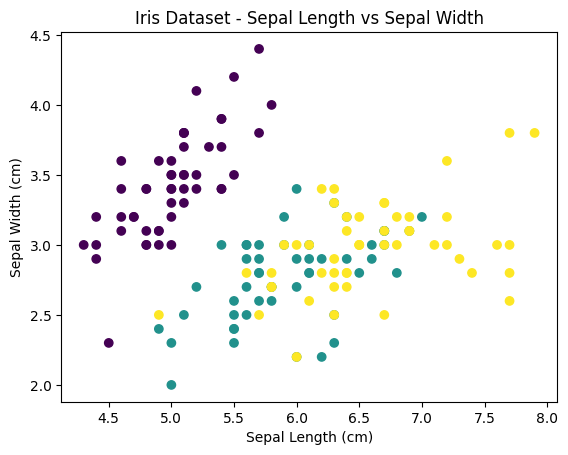

In [4]:
# Choose features (0 = sepal length, 1 = sepal width)
x = iris_dataset.data[:, 0]   # sepal length
y = iris_dataset.data[:, 1]   # sepal width

# Scatter plot
plt.scatter(x, y, c=iris_dataset.target, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - Sepal Length vs Sepal Width')
plt.show()

In [5]:
print('Iris DESCR : \n' , iris_dataset.DESCR)

Iris DESCR : 
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of

In [6]:
print(iris_dataset.target_names )
iris_dataset.feature_names

['setosa' 'versicolor' 'virginica']


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
X_train ,  x_test , y_train , y_test= train_test_split(iris_dataset.data , iris_dataset.target , random_state=0)

In [9]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [16]:
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train ,  y_train)

KNeighborsClassifier(n_neighbors=1)

In [49]:
X_new = np.array([5,2.9,1,0.2] )
X_new.reshape(-1,1)
X_new.shape

(4,)

In [52]:
prediction = knn.predict(X_new.reshape(1, -1))
# prediction

iris_dataset['target_names'][prediction]

array(['setosa'], dtype='<U10')

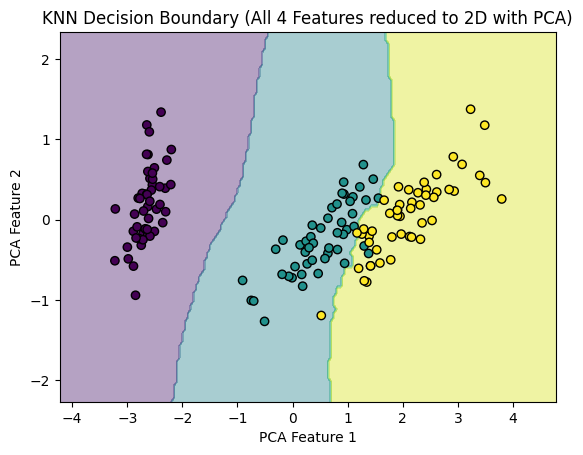

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load data
iris_dataset = load_iris()
X = iris_dataset.data      # 4 features
y = iris_dataset.target

# Reduce 4D -> 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=42)

# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Create mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predict over grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap='viridis')
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.title("KNN Decision Boundary (All 4 Features reduced to 2D with PCA)")
plt.show()


In [64]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [66]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 1.00


In [67]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 1.00
